# Merge subclusterig results

In [1]:
#loading packages
library(Seurat)
library(ggplot2)
library(magrittr)
library(data.table)
library(Matrix)
library(dplyr)
library(tibble)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
#loading data before subclustering
seu_HQC <- readRDS(file = '../../data/seurat_object/NK-data/seu_HQC_NK.obj')
seu_HQC

An object of class Seurat 
24184 features across 1592 samples within 2 assays 
Active assay: SCT (10063 features, 3000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

Warning message:
“Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session.”


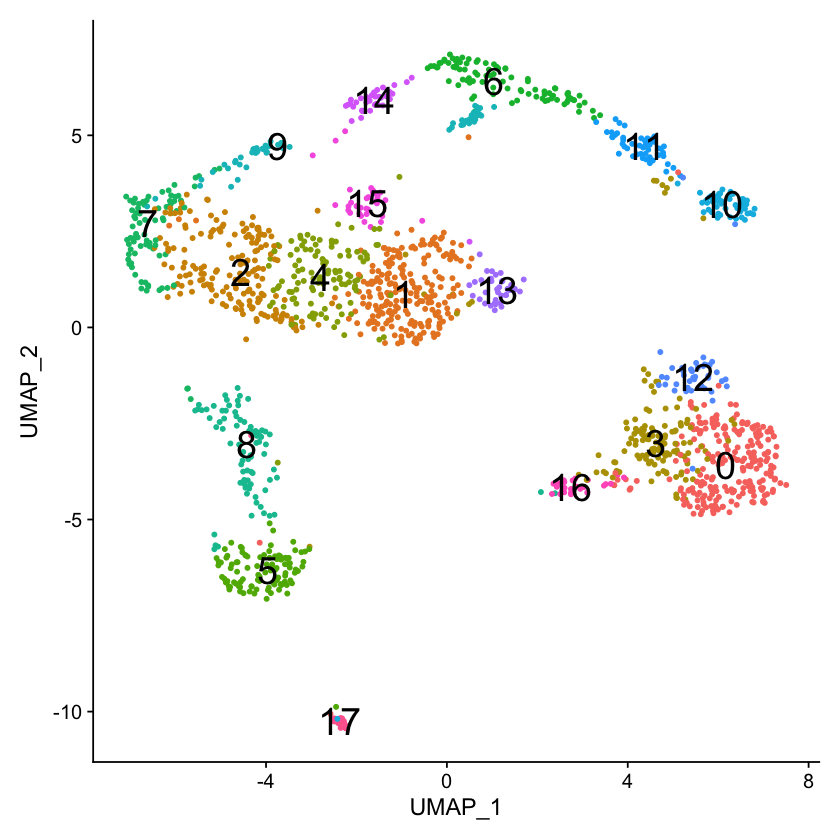

In [3]:
DimPlot(seu_HQC, reduction = 'umap', label = TRUE, label.size = 8) + NoLegend()

In [4]:
#loading subclustering results
seu.ecto <- readRDS(file = '../../data/seurat_object/NK-data/subclustering/seu_lateral_ecto_subclustering_NK.obj')
seu.meso <- readRDS(file = '../../data/seurat_object/NK-data/subclustering/seu_mesoderm_subclustering_NK.obj')
seu.head <- readRDS(file = '../../data/seurat_object/NK-data/subclustering/seu_head_subclustering_NK.obj')
seu.post <- readRDS(file = '../../data/seurat_object/NK-data/subclustering/seu_posterior_subclustering_NK.obj')
seu.ecto
seu.meso
seu.head
seu.post

An object of class Seurat 
22816 features across 627 samples within 2 assays 
Active assay: SCT (8695 features, 0 variable features)
 1 other assay present: RNA

An object of class Seurat 
24184 features across 531 samples within 2 assays 
Active assay: SCT (10063 features, 0 variable features)
 1 other assay present: RNA

An object of class Seurat 
24184 features across 186 samples within 2 assays 
Active assay: SCT (10063 features, 3000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

An object of class Seurat 
24184 features across 185 samples within 2 assays 
Active assay: SCT (10063 features, 3000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [5]:
seu.midline <- subset(seu_HQC,idents=c('13'))
seu.midline$manual_ID <- 'midline_cells'

seu.polecell <- subset(seu_HQC,idents=c('17'))
seu.polecell$manual_ID <- 'pole_cells'

## merge results

In [6]:
seu.merge <- merge(seu.ecto, y = c(seu.meso,seu.head,seu.post,seu.midline,seu.polecell))
seu.merge

An object of class Seurat 
24184 features across 1592 samples within 2 assays 
Active assay: SCT (10063 features, 0 variable features)
 1 other assay present: RNA

In [7]:
seu_HQC$manual_ID <- seu.merge$manual_ID

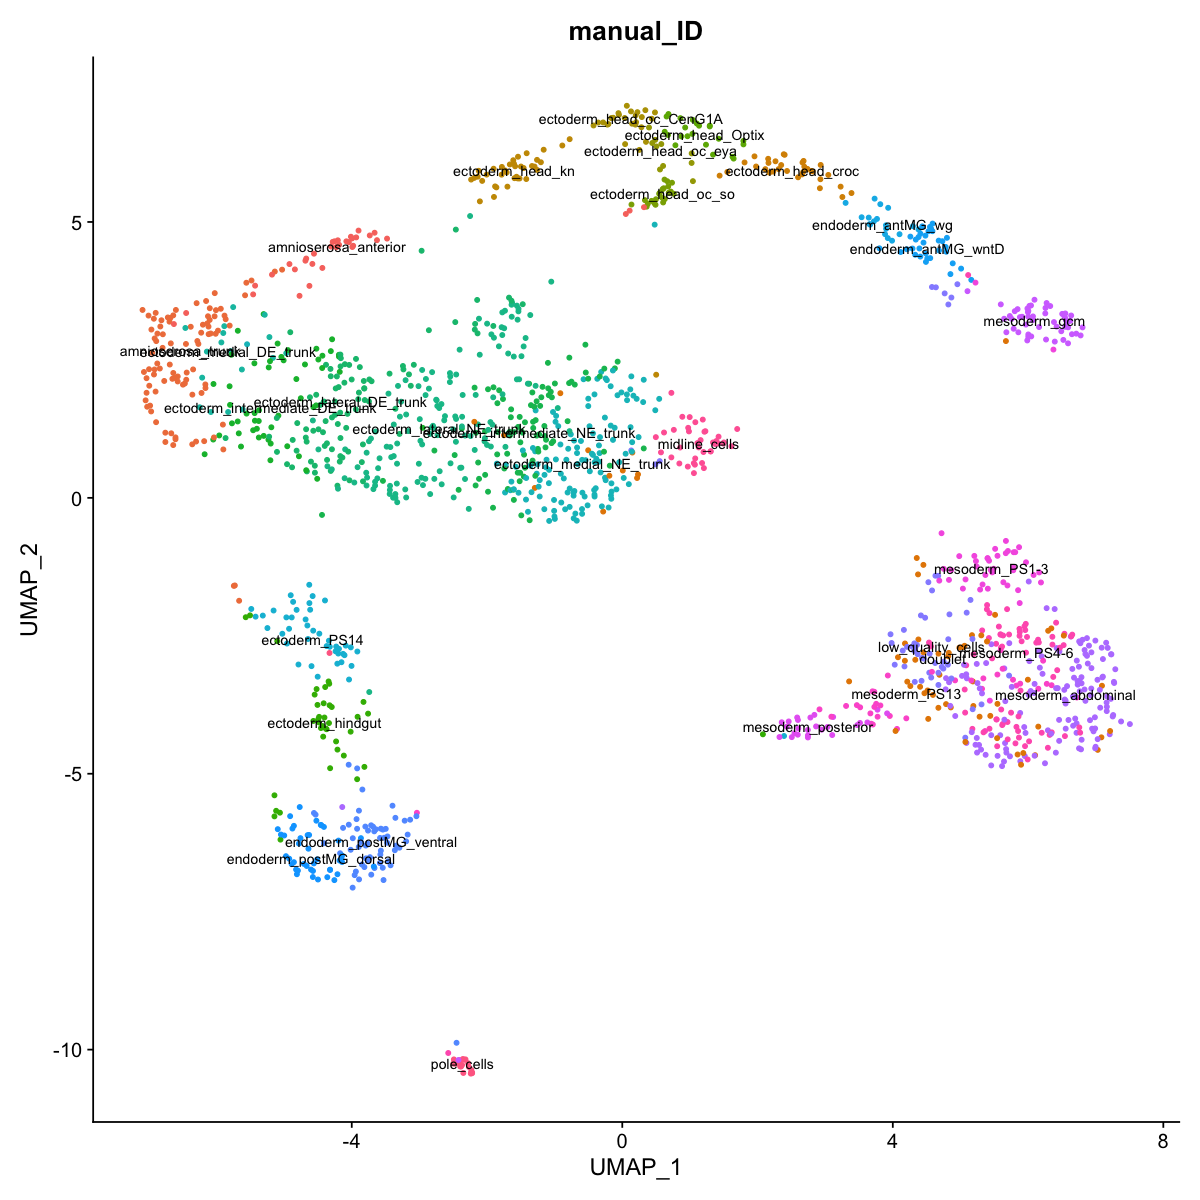

In [8]:
options(repr.plot.width=10, repr.plot.height=10)
DimPlot(seu_HQC, reduction = 'umap', label.size = 3, group.by = 'manual_ID', label=T) + NoLegend()

## Remove doublets and low-quality cells

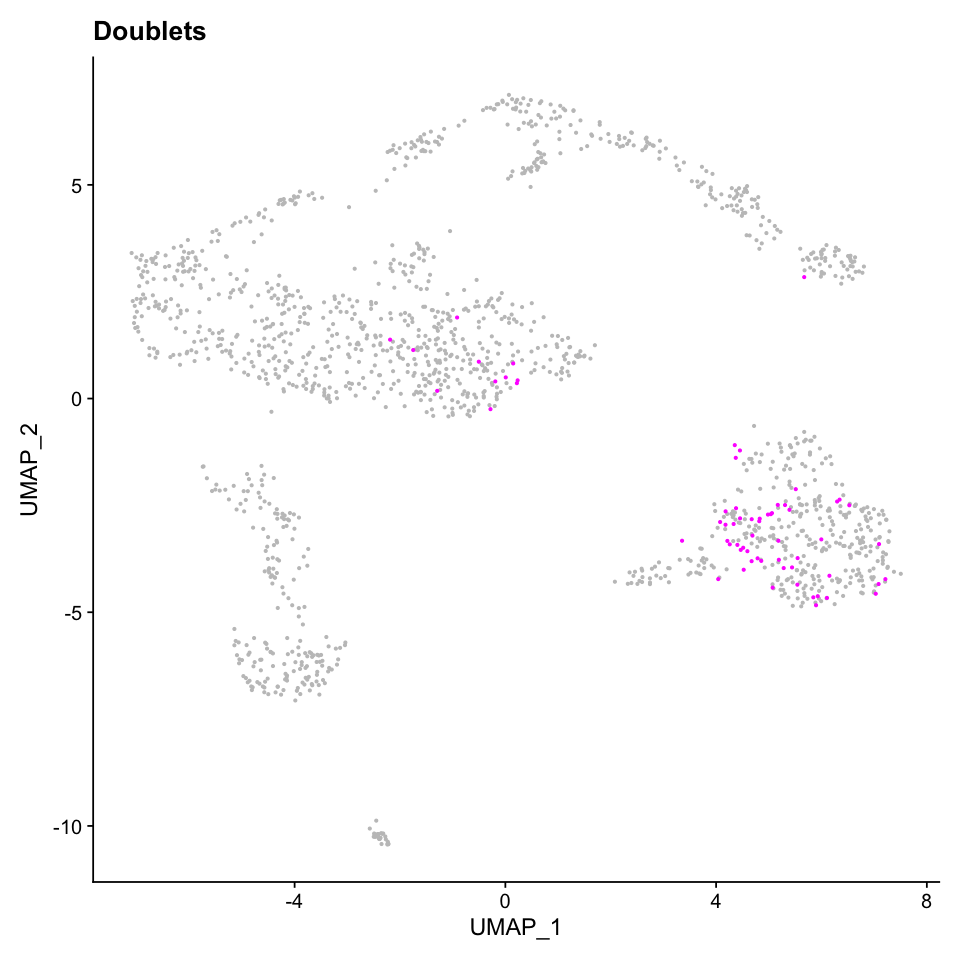

In [9]:
Idents(seu_HQC) <- 'manual_ID'
options(repr.plot.width=8, repr.plot.height=8)
highlight.cells <- WhichCells(seu_HQC,idents = c('doublet'))
DimPlot(seu_HQC, reduction =  "umap", cells.highlight = highlight.cells, pt.size = 0.5, sizes.highlight = 0.5,
        cols.highlight = 'magenta', label = FALSE) + NoLegend() + ggtitle('Doublets')

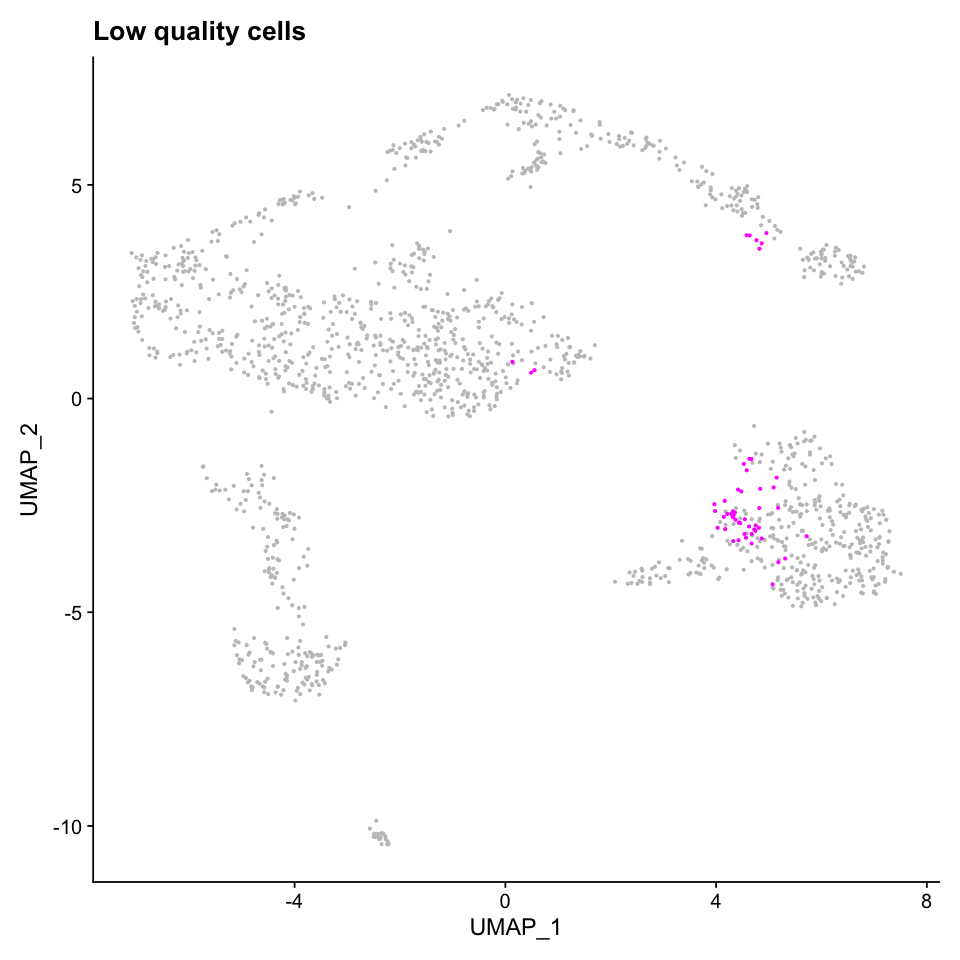

In [10]:
Idents(seu_HQC) <- 'manual_ID'
options(repr.plot.width=8, repr.plot.height=8)
highlight.cells <- WhichCells(seu_HQC,idents = c('low_quality_cells'))
DimPlot(seu_HQC, reduction =  "umap", cells.highlight = highlight.cells, pt.size = 0.5, sizes.highlight = 0.5,
        cols.highlight = 'magenta', label = FALSE) + NoLegend() + ggtitle('Low quality cells')

In [11]:
write.table(as.data.frame(seu_HQC$manual_ID), sep='\t', file='./manual_ID_NK.txt', col.names=FALSE)

In [12]:
seu.non.stressed <- subset(seu_HQC, ident=c('low_quality_cells', 'doublet'),invert=T)
seu.non.stressed

An object of class Seurat 
24184 features across 1476 samples within 2 assays 
Active assay: SCT (10063 features, 3000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

## Re-normalize without doublets and low-quality cells

In [13]:
DefaultAssay(seu.non.stressed) <- 'RNA'
seu.non.stressed <- suppressWarnings(SCTransform(seu.non.stressed, vars.to.regress = c('percent.mt','percent.rRNA')))

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 10003 by 1476

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 1476 cells



  |======================================================================| 100%


Found 68 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 10003 genes



  |======================================================================| 100%


Computing corrected count matrix for 10003 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 16.3932 secs

Determine variable features

Set 3000 variable features

Place corrected count matrix in counts slot

Regressing out percent.mt, percent.rRNA

Centering data matrix

Set default assay to SCT



PC_ 1 
Positive:  Ilp4, hll, twi, VepD, sna, Cyp310a1, Mes2, CG12177, zfh1, CG3036 
	   CG14688, CadN, CG16758, ltl, stumps, Nplp2, sty, htl, Act87E, Pka-C3 
	   Mef2, if, CG9005, stg, tin, CG43355-sala, Mdr49, lncRNA:CR45361, Asph, be 
Negative:  CG13427, Lac, CG34224, Tom, cv-2, CG15628, Atx-1, Ptr, sdt, CG5059 
	   CG10035, grh, Brd, aop, kek1, Doc1, ASPP, BobA, ths, pnr 
	   SoxN, Dtg, CG14915, rho, Ppa, tup, 5-HT2A, egr, CG45263, btsz 
PC_ 2 
Positive:  SoxN, sog, ths, sca, ImpL2, brk, slp1, Pino, tra, CG43355-sala 
	   CG5059, Dl, Cys, D, gsb, CG13427, pyr, CG15628, rdx, mid 
	   Meltrin, HnRNP-K, sad, CG42662-CG30080, wb, Obp99a, Tollo, CG34224, lok, vnd 
Negative:  emc, egr, Doc1, Ama, tup, phu, kek1, Doc3, srp, Doc2 
	   Dtg, mirr, cv-2, peb, hbs, net, CG12420, CG45263, Z600, Ance 
	   ush, MFS14, bun, zen, CG13653, pnr, CG14427, CG15236, CG14915, Nrt 
PC_ 3 
Positive:  pgc, Hsp83, fabp-sea, nos, awd, CG12112, BigH1, Eno, fkh, cib 
	   stai, aay, zpg, CG2852, spz, RNASEK, p23,

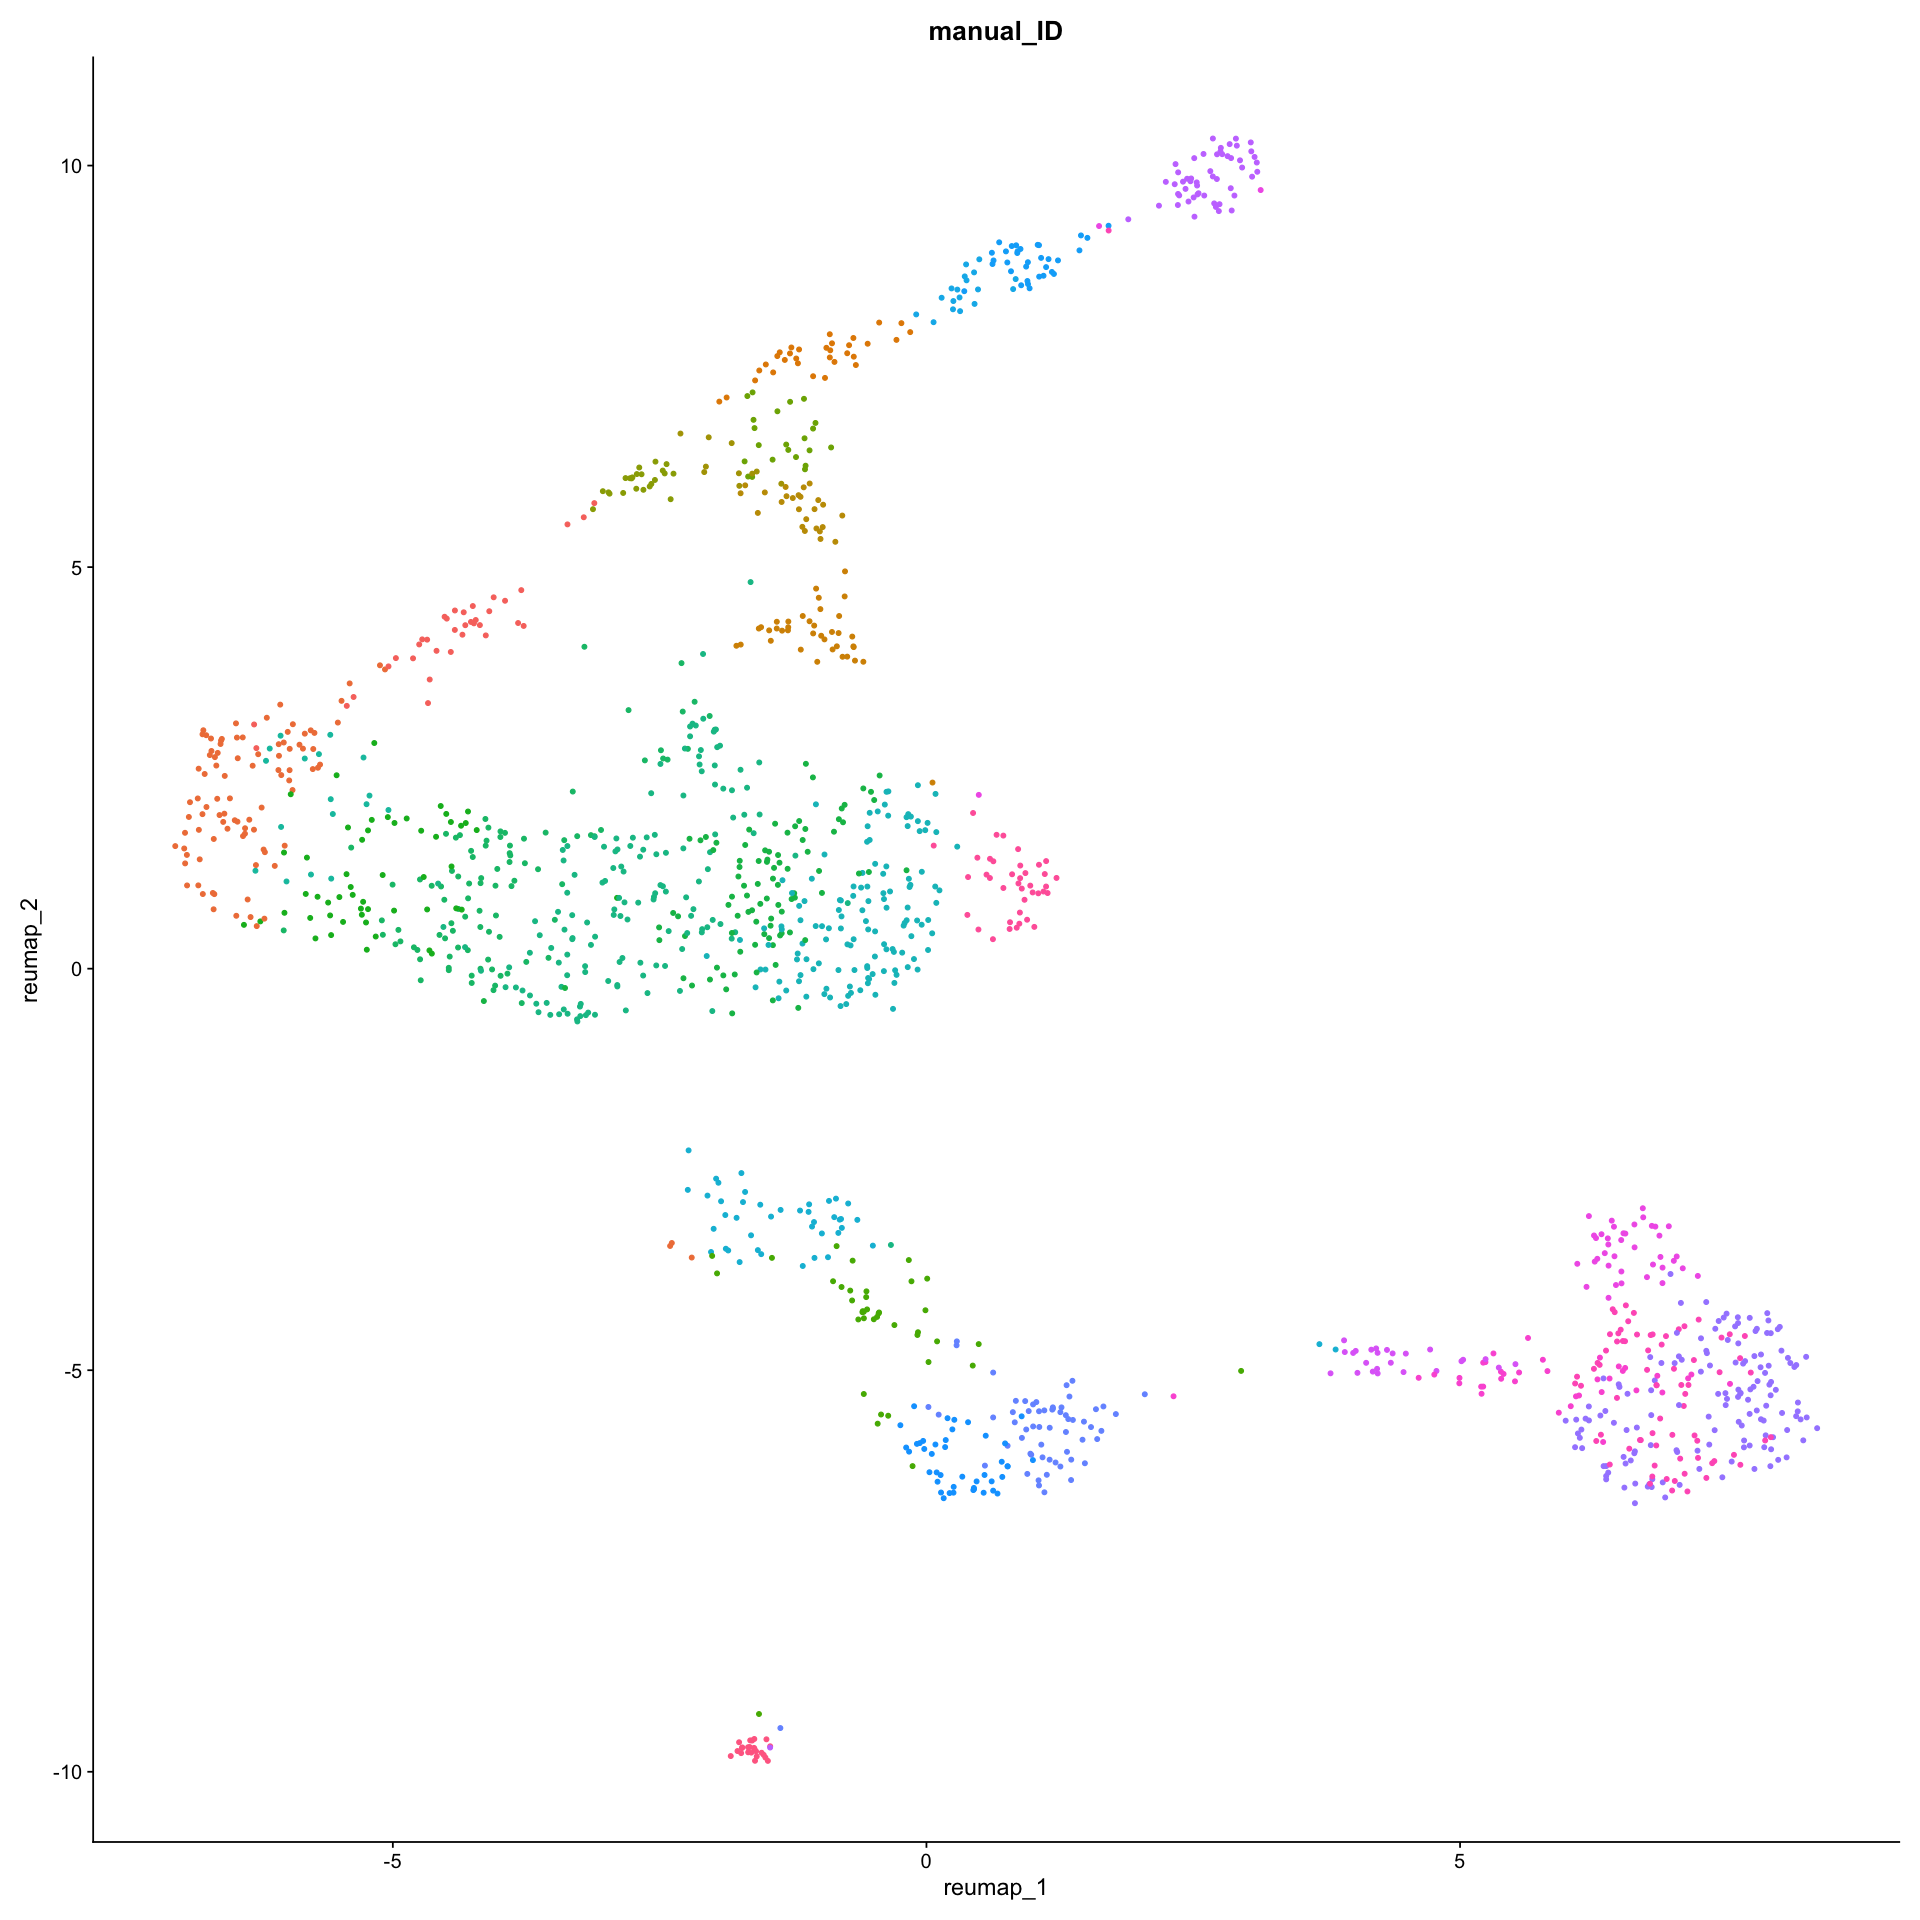

In [14]:
seu.non.stressed <- RunPCA(seu.non.stressed)
seu.non.stressed <- RunUMAP(seu.non.stressed, dims=1:30, reduction.name = 'reumap')
options(repr.plot.width=16, repr.plot.height=16)
DimPlot(seu.non.stressed, reduction = 'reumap', label.size = 8, group.by = 'manual_ID') + NoLegend()

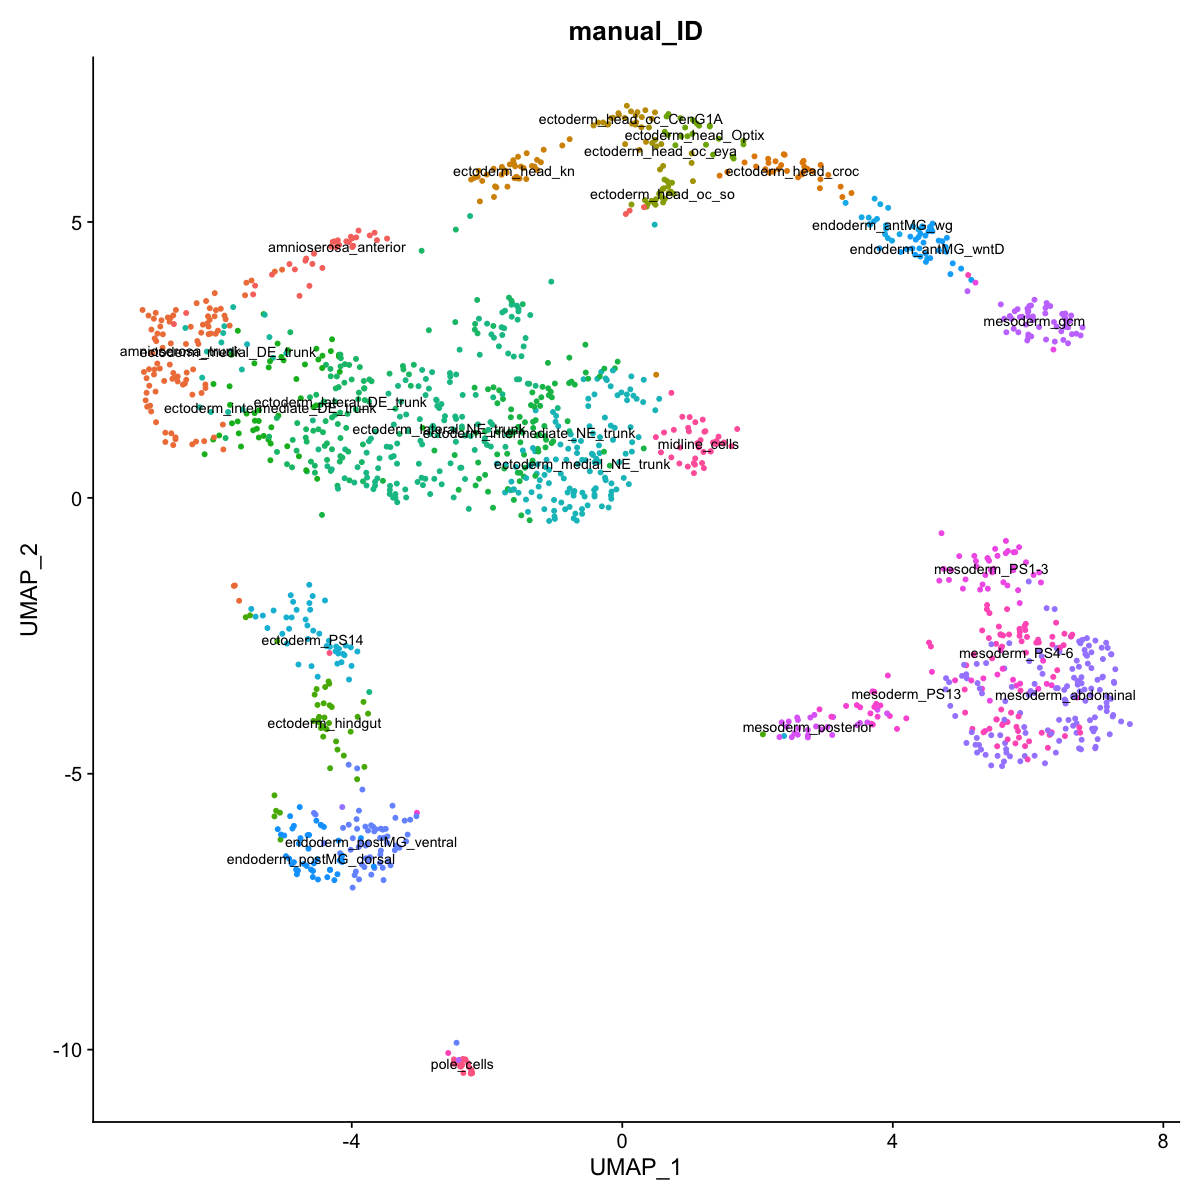

In [15]:
options(repr.plot.width=10, repr.plot.height=10)
DimPlot(seu.non.stressed, reduction = 'umap', label.size = 3, group.by = 'manual_ID', label=T) + NoLegend()

In [16]:
levels <- read.table(file="./manual_ID_levels_color_NK.txt")
colors <- levels[,2]
levels <- levels[,1]
head(levels)
length(levels)
head(colors)
Idents(seu.non.stressed) <- 'manual_ID'
levels(seu.non.stressed) <- levels

[1] "ectoderm_head_croc"      "ectoderm_head_Optix"    
[3] "ectoderm_head_oc_eya"    "ectoderm_head_oc_so"    
[5] "ectoderm_head_oc_CenG1A" "ectoderm_head_kn"

[1] 28

[1] "lightsteelblue1" "lightsteelblue3" "lightskyblue1"   "lightskyblue2"  
[5] "lightskyblue3"   "skyblue3"

Saving 7 x 7 in image



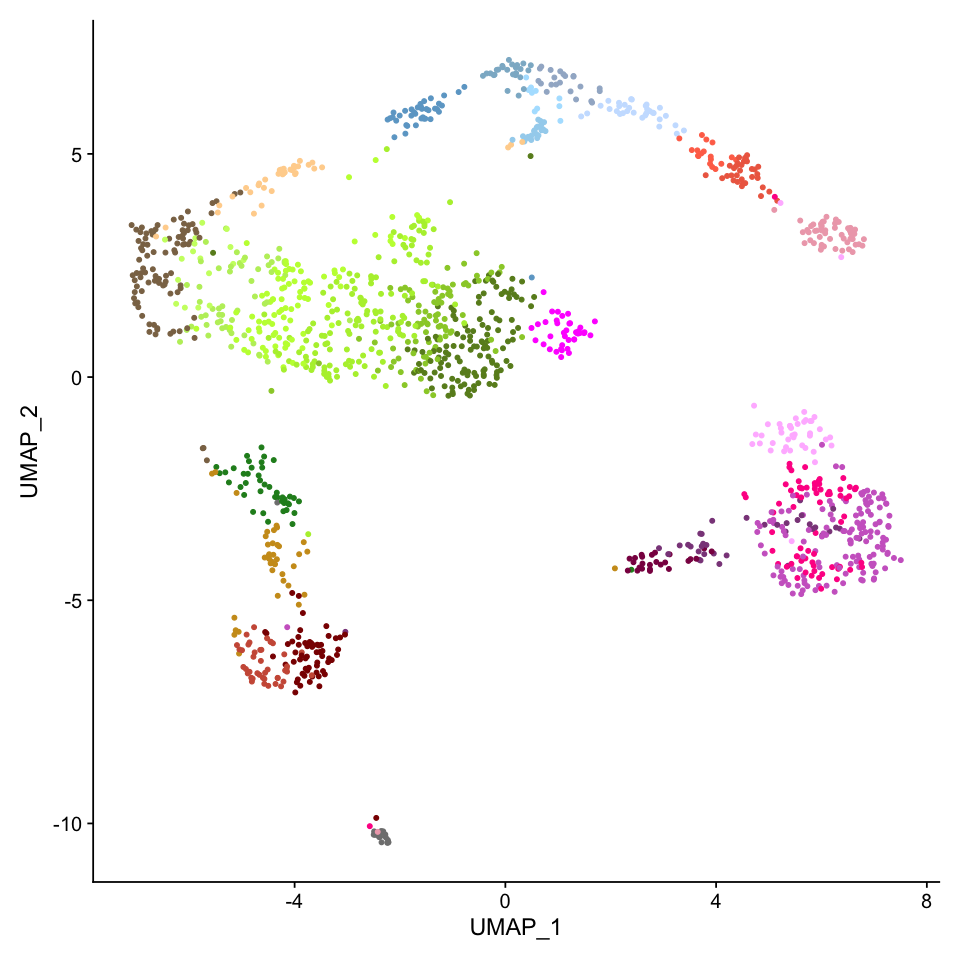

In [17]:
options(repr.plot.width=8, repr.plot.height=8)
fig <- DimPlot(seu.non.stressed, reduction =  "umap", label = FALSE, cols = colors) + NoLegend() 
fig
ggsave(fig, file = "./figures/06_merge_ID_NK/all_cells_umap_NK.eps", dpi = 300)

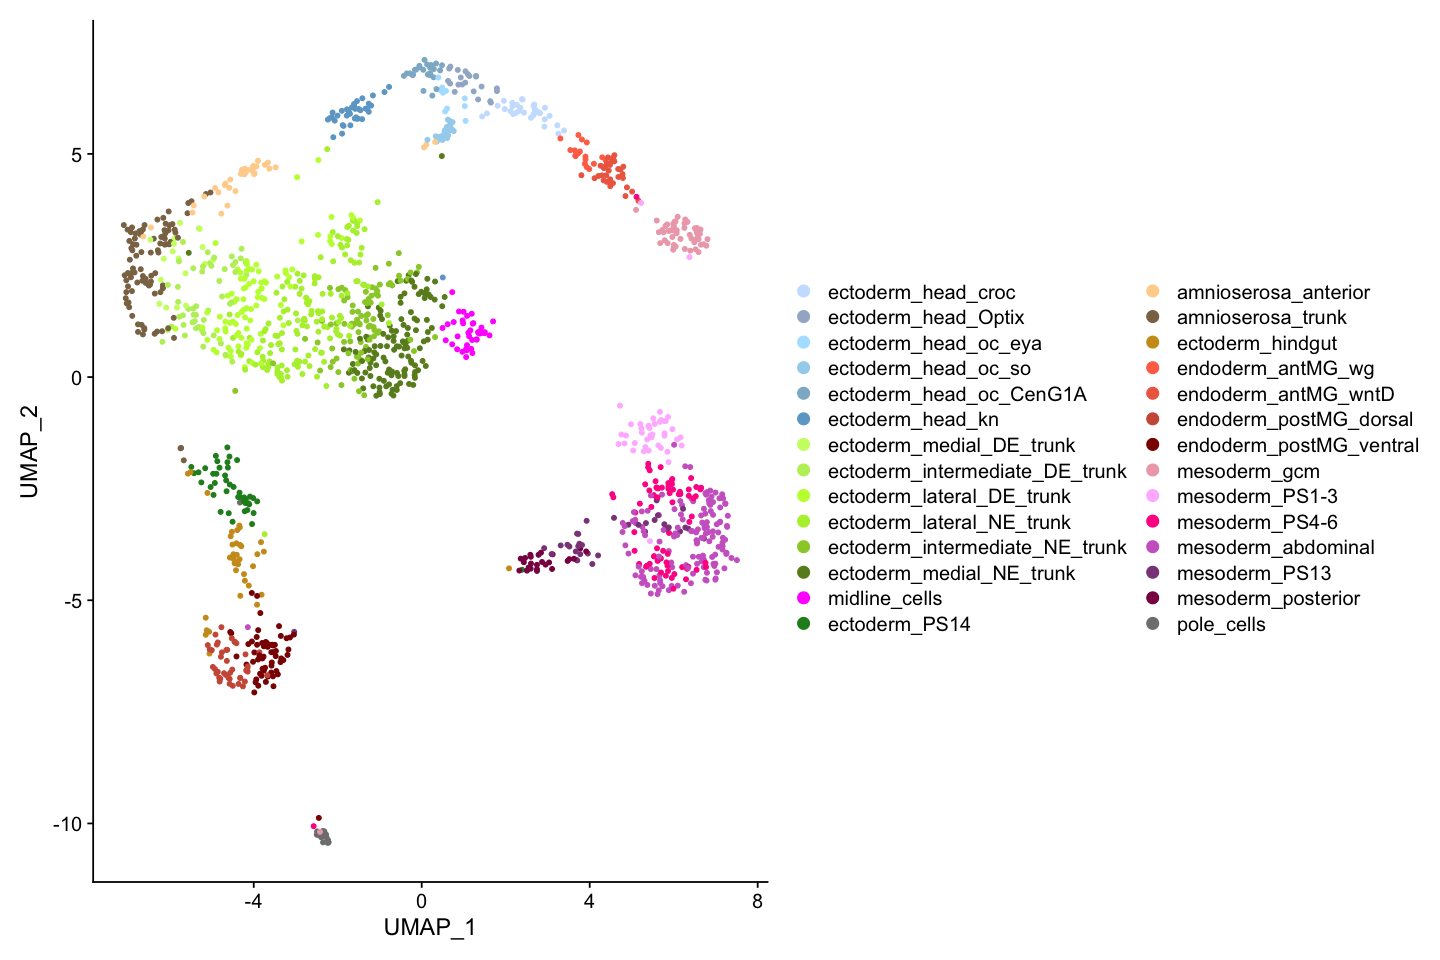

In [18]:
options(repr.plot.width=12, repr.plot.height=8)
fig <- DimPlot(seu.non.stressed, reduction =  "umap", label = FALSE, cols = colors)
fig
ggsave(fig, file = "./figures/06_merge_ID_NK/all_cells_umap2_NK.eps", dpi = 300, width = 12, height = 8)

## Preparation for making loom file for SCope

In [19]:
manual_ID <- seu.non.stressed$manual_ID
unique.manual_ID <- unique(manual_ID)
manual_ID_num <- copy(manual_ID)
i <- 1
for (name in unique.manual_ID){
    rname <- paste('^',name, sep = '')
    rname <- paste(rname, '$', sep = '')
    manual_ID_num <- gsub(manual_ID_num, pattern = rname, replacement = i)
    i <- i + 1
}
seu.non.stressed$manual_ID_num <- manual_ID_num

In [20]:
Idents(seu.non.stressed) <- 'manual_ID'
annot_df <- data.frame(list(
    cluster_id = 1:length(unique.manual_ID), 
    cluster_name = unique.manual_ID))
annot_df

cluster_id,cluster_name
<int>,<chr>
1,mesoderm_abdominal
2,ectoderm_intermediate_DE_trunk
3,ectoderm_intermediate_NE_trunk
4,amnioserosa_trunk
5,mesoderm_posterior
6,ectoderm_medial_NE_trunk
7,ectoderm_lateral_NE_trunk
8,mesoderm_PS1-3
9,ectoderm_head_croc


In [21]:
write.csv(annot_df, file = './annot_df.csv')

In [22]:
saveRDS(object = seu_HQC, file = '../../data/seurat_object/NK-data/seu_HQC_subclusterd_NK.obj')

In [23]:
saveRDS(object = seu.non.stressed, file = '../../data/seurat_object/NK-data/seu_HQC_subclusterd2_NK.obj')

In [24]:
sessionInfo()

R version 4.0.3 (2020-10-10)
Platform: x86_64-apple-darwin17.0 (64-bit)
Running under: macOS Catalina 10.15.7

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.0/Resources/lib/libRblas.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/4.0/Resources/lib/libRlapack.dylib

locale:
[1] ja_JP.UTF-8/ja_JP.UTF-8/ja_JP.UTF-8/C/ja_JP.UTF-8/ja_JP.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] tibble_3.0.5      dplyr_1.0.3       Matrix_1.3-2      data.table_1.13.6
[5] magrittr_2.0.1    ggplot2_3.3.3     Seurat_3.2.3     

loaded via a namespace (and not attached):
  [1] nlme_3.1-151          matrixStats_0.57.0    RcppAnnoy_0.0.18     
  [4] RColorBrewer_1.1-2    httr_1.4.2            repr_1.1.0           
  [7] sctransform_0.3.2     tools_4.0.3           R6_2.5.1             
 [10] irlba_2.3.3           rpart_4.1-15          KernSmooth_2.23-18   
 [13] uwot_0.1.10           mgcv